<a href="https://colab.research.google.com/github/RogerioSFFilho/ProjetosT-D/blob/main/TESTE_A_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# @title Interface interativa com múltiplas abas para conceitos de Teste A/B
%%capture --no-display

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import ipywidgets as widgets

# Tab 1: Hipótese nula e alternativa
out1 = widgets.Output()
with out1:
    text = ("**Hipótese Nula (H0) e Hipótese Alternativa (H1):** Em um teste de hipóteses A/B, definimos:\n"
            "- **H0** (nula): geralmente afirma que não há diferença ou efeito (ex: as duas versões têm a mesma taxa de conversão).\n"
            "- **H1** (alternativa): afirma que existe uma diferença ou efeito (ex: uma versão tem taxa de conversão maior que a outra).\n\n"
            "Inicialmente, supõe-se que H0 é verdadeira; o teste busca evidências nos dados para possivelmente rejeitar H0 em favor de H1.")
    display(Markdown(text))
    # Visualização: comparação de métricas sob H0 vs H1
    fig, axes = plt.subplots(1, 2, figsize=(7, 4))
    # Valores de exemplo para métricas (ex: taxas de conversão em %)
    metric_A = 10   # A = 10%
    metric_B_H0 = 10  # B = 10% sob H0 (igual A)
    metric_B_H1 = 15  # B = 15% sob H1 (maior que A)
    # Gráfico H0 (barras de mesma altura)
    axes[0].bar(['A', 'B'], [metric_A, metric_B_H0], color='skyblue')
    axes[0].set_ylim(0, 20)
    axes[0].set_title("H0: sem diferença")
    axes[0].set_ylabel("Métrica (% conversão)")
    for i, v in enumerate([metric_A, metric_B_H0]):
        axes[0].text(i, v + 0.5, f"{v}%", ha='center', color='black')
    # Gráfico H1 (barra B maior)
    axes[1].bar(['A', 'B'], [metric_A, metric_B_H1], color=['skyblue', 'orange'])
    axes[1].set_ylim(0, 20)
    axes[1].set_title("H1: com diferença")
    for i, v in enumerate([metric_A, metric_B_H1]):
        axes[1].text(i, v + 0.5, f"{v}%", ha='center', color='black')
    plt.tight_layout()
    plt.show()

# Tab 2: Valor-p (p-valor)
out2 = widgets.Output()
with out2:
    text = ("**Valor-p (p-valor):** O valor-p é a probabilidade de observar um resultado tão ou mais extremo **do que** o observado, assumindo que H0 é verdadeira. "
            "Um valor-p baixo indica que seria muito improvável ver os dados atuais se H0 fosse verdadeira, o que sugere evidência contra H0. "
            "Por exemplo, se o valor-p = 0,03, há 3% de chance de um resultado assim sob H0. "
            "Comparamos o valor-p ao nível de significância (α); se for menor, rejeitamos H0.")
    display(Markdown(text))
    # Visualização: distribuição normal com área do p-valor
    x = np.linspace(-4, 4, 400)
    pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)  # PDF da normal padrão (H0)
    estatistica = 2.0  # valor observado da estatística de teste (ex: z = 2.0)
    # Região de p-valor (cauda à direita da estatística observada)
    p_region = x >= estatistica
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, pdf, color='black')
    ax.fill_between(x, 0, pdf, where=p_region, color='orange', alpha=0.3)
    ax.axvline(estatistica, color='black', linestyle='--')
    # Anotação indicando a área do p-valor
    ax.annotate("p-valor", xy=(2.3, 0.015), xytext=(3, 0.08),
                arrowprops=dict(color='orange', arrowstyle='->'), color='orange')
    ax.set_xlabel("Estatística de teste (sob H0)")
    ax.set_ylabel("Densidade de probabilidade")
    plt.tight_layout()
    plt.show()

# Tab 3: Nível de significância (α)
out3 = widgets.Output()
with out3:
    text = ("**Nível de significância (α):** É o critério escolhido antes do teste para definir um resultado como significativo. "
            "Por exemplo, α = 0,05 (5%). Representa a probabilidade de rejeitar H0 por acaso que estamos dispostos a aceitar. "
            "Se o valor-p obtido for menor que α, rejeitamos H0 (resultado estatisticamente significativo). "
            "α define a região crítica de rejeição de H0 (ex.: 5% das extremidades da distribuição sob H0).")
    display(Markdown(text))
    # Visualização: distribuição normal com região de significância (α)
    x = np.linspace(-4, 4, 400)
    pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
    alpha = 0.05
    # Valor crítico para cauda direita (α = 0,05 unilateral)
    crit_value = 1.645  # ~percentil 95% da normal padrão
    region = x >= crit_value
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, pdf, color='black')
    ax.fill_between(x, 0, pdf, where=region, color='red', alpha=0.3)
    ax.axvline(crit_value, color='black', linestyle='--')
    ax.text(crit_value + 0.1, 0.02, "α = 0,05", rotation=90, color='red')
    ax.set_xlabel("Estatística de teste (sob H0)")
    ax.set_ylabel("Densidade de probabilidade")
    plt.tight_layout()
    plt.show()

# Tab 4: Teste unilateral vs bilateral
out4 = widgets.Output()
with out4:
    text = ("**Teste Unilateral vs Bilateral:** Em um teste *unilateral* (uma cauda), consideramos o efeito em apenas uma direção (ex: H1: versão B > versão A), concentrando todo α em uma única cauda da distribuição. "
            "Já um teste *bilateral* (duas caudas) considera diferenças em ambas as direções (ex: H1: B ≠ A), dividindo α/2 em cada extremidade. "
            "Testes bilaterais exigem efeitos mais fortes para atingir significância, pois a mesma α é dividida entre as duas caudas.")
    display(Markdown(text))
    # Visualização: regiões críticas para teste unilateral vs bilateral
    x = np.linspace(-4, 4, 400)
    pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
    alpha = 0.05
    crit_one = 1.645   # limiar 5% uma cauda (unilateral)
    crit_two = 1.96    # limiar 2.5% cauda direita (bilateral, 5% total)
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    # Unilateral
    axes[0].plot(x, pdf, color='black')
    axes[0].fill_between(x, 0, pdf, where=(x >= crit_one), color='red', alpha=0.3)
    axes[0].axvline(crit_one, color='black', linestyle='--')
    axes[0].set_title("Unilateral (α=0,05 em 1 cauda)")
    axes[0].set_xlabel("Estatística (H0)")
    axes[0].set_ylabel("Densidade")
    # Bilateral
    axes[1].plot(x, pdf, color='black')
    axes[1].fill_between(x, 0, pdf, where=(x >= crit_two), color='red', alpha=0.3)
    axes[1].fill_between(x, 0, pdf, where=(x <= -crit_two), color='red', alpha=0.3)
    axes[1].axvline(crit_two, color='black', linestyle='--')
    axes[1].axvline(-crit_two, color='black', linestyle='--')
    axes[1].set_title("Bilateral (α=0,05 em 2 caudas)")
    axes[1].set_xlabel("Estatística (H0)")
    axes[1].set_ylabel("Densidade")
    plt.tight_layout()
    plt.show()

# Tab 5: Poder estatístico (power)
out5 = widgets.Output()
with out5:
    text = ("**Poder estatístico (power):** O poder de um teste é a probabilidade de detectar um efeito real (rejeitar H0) quando H1 é verdadeira. "
            "Equivale a 1 - \u03B2 (onde \u03B2 é a probabilidade de erro Tipo II). Por exemplo, um poder de 80% significa 80% de chance de identificar uma diferença existente. "
            "O poder aumenta com amostras maiores, efeitos mais fortes e com níveis de significância menos rigorosos (α maior).")
    display(Markdown(text))
    # Visualização: distribuições H0 vs H1 com área de poder
    x = np.linspace(-4, 8, 500)
    pdf_H0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
    pdf_H1 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-2)**2))
    thr = 1.645
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, pdf_H0, label="H0 verdadeiro", color='blue', linestyle='--')
    ax.plot(x, pdf_H1, label="H1 verdadeiro", color='orange')
    ax.axvline(thr, color='black', linestyle='--')
    # Área de poder: região sob H1 além do limiar
    ax.fill_between(x, 0, pdf_H1, where=(x >= thr), color='green', alpha=0.3, label="Poder (1-\u03B2)")
    ax.set_xlabel("Métrica / Estatística")
    ax.set_ylabel("Densidade de probabilidade")
    ax.legend(loc='upper right')
    ax.set_title("Distribuições H0 vs H1 - área verde = poder")
    plt.tight_layout()
    plt.show()

# Tab 6: Tamanho do efeito
out6 = widgets.Output()
with out6:
    text = ("**Tamanho do efeito:** É a magnitude da diferença ou efeito que está sendo testado. Pode ser medido de várias formas (diferença absoluta, diferença relativa, Cohen's d etc.). "
            "Um efeito maior é mais fácil de detectar (maior poder estatístico) do que um efeito muito pequeno. "
            "Por exemplo, é mais fácil detectar uma variação na taxa de conversão de 10% para 15% (efeito grande) do que de 10% para 11% (efeito pequeno). "
            "Efeitos muito pequenos geralmente exigem amostras maiores para alcançarem significância estatística.")
    display(Markdown(text))
    # Visualização: distribuições para efeito pequeno vs grande
    x = np.linspace(-4, 4, 400)
    # Efeito pequeno: H0 (μ=0) vs H1 (μ=0.5)
    pdf_H0_small = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
    # Corrected standard deviation for H1 small
    mean_h1_small = 0.5
    pdf_H1_small = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mean_h1_small)**2))
    # Efeito grande: H0 (μ=0) vs H1 (μ=2)
    pdf_H0_large = pdf_H0_small  # mesma H0
    mean_h1_large = 2
    pdf_H1_large = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x - mean_h1_large)**2))

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    # Gráfico efeito pequeno
    axes[0].plot(x, pdf_H0_small, label="H0", color='blue', linestyle='--')
    axes[0].plot(x, pdf_H1_small, label=f"H1 (efeito={mean_h1_small})", color='orange')
    axes[0].set_title("Efeito pequeno (H1 próximo de H0)")
    axes[0].set_xlabel("Métrica")
    axes[0].set_ylabel("Densidade")
    axes[0].legend()
    # Gráfico efeito grande
    axes[1].plot(x, pdf_H0_large, label="H0", color='blue', linestyle='--')
    axes[1].plot(x, pdf_H1_large, label=f"H1 (efeito={mean_h1_large})", color='orange')
    axes[1].set_title("Efeito grande (H1 afastado de H0)")
    axes[1].set_xlabel("Métrica")
    axes[1].set_ylabel("Densidade")
    axes[1].legend()
    plt.tight_layout()
    plt.show()

# Tab 7: Tamanho da amostra
out7 = widgets.Output()
with out7:
    text = ("**Tamanho da amostra:** É a quantidade de observações em cada grupo do teste. Amostras maiores reduzem a incerteza (variabilidade) das estimativas, tornando mais fácil detectar diferenças se elas existem. "
            "Com mais dados, a distribuição da média amostral fica mais estreita (menor erro padrão), aumentando a chance de obter um resultado significativo caso exista um efeito real. "
            "Ou seja, aumentar o tamanho da amostra geralmente aumenta o poder do teste (até certo limite).")
    display(Markdown(text))
    # Visualização: distribuições da média amostral para n pequeno vs n grande
    x = np.linspace(-4, 4, 400)
    # Supondo desvio padrão populacional = 1
    n_small = 10
    n_large = 100
    # Distribuição da média ~ N(0, 1/n)
    pdf_small = (1/np.sqrt(2*np.pi*(1/n_small))) * np.exp(-0.5 * (x**2) * n_small)
    pdf_large = (1/np.sqrt(2*np.pi*(1/n_large))) * np.exp(-0.5 * (x**2) * n_large)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, pdf_small, label=f"n = {n_small}", color='orange')
    ax.plot(x, pdf_large, label=f"n = {n_large}", color='blue')
    # Marcar os desvios padrão das distribuições
    sd_small = 1/np.sqrt(n_small)
    sd_large = 1/np.sqrt(n_large)
    ax.axvline(sd_small, color='orange', linestyle=':')
    ax.axvline(-sd_small, color='orange', linestyle=':')
    ax.axvline(sd_large, color='blue', linestyle=':')
    ax.axvline(-sd_large, color='blue', linestyle=':')
    ax.text(sd_small + 0.05, 0.1, "Desv. padrão (n pequeno)", color='orange', rotation=90)
    ax.text(sd_large + 0.05, 0.1, "Desv. padrão (n grande)", color='blue', rotation=90)
    ax.set_title("Distribuição da média - amostra pequena vs grande")
    ax.set_xlabel("Estimativa (ex: média ou diferença)")
    ax.set_ylabel("Densidade")
    ax.legend()
    plt.tight_layout()
    plt.show()

# Tab 8: Erros do Tipo I e Tipo II
out8 = widgets.Output()
with out8:
    text = ("**Erros do Tipo I e Tipo II:** Ao tomar decisões em um teste de hipótese, podemos cometer dois tipos de erro:\n"
            "- **Erro Tipo I**: falso positivo - rejeitar H0 quando ela é verdadeira. A probabilidade desse erro é α (por exemplo, α = 0,05 significa 5% de chance de falso alarme).\n"
            "- **Erro Tipo II**: falso negativo - não rejeitar H0 quando H1 é verdadeira. A probabilidade desse erro é denotada por β. O poder do teste é 1-β, ou seja, a chance de **não** cometer um erro Tipo II.\n\n"
            "Há uma relação inversa entre esses erros: se reduzimos α para diminuir falsos positivos, aumentamos β (mais falsos negativos), e vice-versa.")
    display(Markdown(text))
    # Visualização: distribuições H0 vs H1 com áreas de erro Tipo I e II
    x = np.linspace(-4, 8, 500)
    pdf_H0 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)
    pdf_H1 = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x-2)**2))
    thr = 1.645
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, pdf_H0, label="H0 verdadeiro", color='blue', linestyle='--')
    ax.plot(x, pdf_H1, label="H1 verdadeiro", color='orange')
    ax.axvline(thr, color='black', linestyle='--')
    # Erro Tipo I (α): área sob H0 acima do limiar
    ax.fill_between(x, 0, pdf_H0, where=(x >= thr), color='red', alpha=0.3, label="Erro Tipo I (α)")
    # Erro Tipo II (β): área sob H1 abaixo do limiar
    ax.fill_between(x, 0, pdf_H1, where=(x < thr), color='orange', alpha=0.3, label="Erro Tipo II (β)")
    # Anotações de texto nas regiões de erro
    ax.text(thr + 0.2, 0.05, "Erro Tipo I", color='red')
    ax.text(0.8, 0.1, "Erro Tipo II", color='orange')
    ax.set_xlabel("Métrica / Estatística")
    ax.set_ylabel("Densidade de probabilidade")
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Montar abas interativas
tabs = widgets.Tab(children=[out1, out2, out3, out4, out5, out6, out7, out8])
titles = ["H0 vs H1", "Valor-p", "Significância", "Unilateral vs Bilateral", "Poder", "Tam. efeito", "Tam. amostra", "Erros Tipo I/II"]
for i, t in enumerate(titles):
    tabs.set_title(i, t)
display(tabs)

#Análise de Teste A/B de Campanha de Marketing

##Introdução

Empresas de marketing frequentemente realizam testes A/B para avaliar a efetividade de diferentes estratégias de campanha. Neste contexto, a maior parte dos usuários é exposta a anúncios (grupo de teste “ad”) enquanto uma pequena parcela vê apenas uma campanha de utilidade pública ou nenhum anúncio (grupo de controle “psa”). O objetivo é determinar se a campanha com anúncios foi bem-sucedida, quantificar a diferença observada entre o grupo que viu anúncios e o grupo de controle, e verificar se essa diferença é estatisticamente significativa
yellow-dune.kreatewebsites.com
. Em outras palavras, vamos avaliar se a exposição a anúncios aumenta a taxa de conversão de usuários (compra do produto) de forma significativa em relação ao cenário sem anúncios.

##Carregamento e Preparação dos Dados

Para esta análise, utilizamos o dataset “Marketing A/B Testing” do Kaggle, que contém informações de aproximadamente 588 mil usuários. Cada entrada indica se o usuário viu um anúncio ou apenas o PSA, e se ele converteu (realizou a compra) ou não, além de alguns dados sobre quantidade de anúncios vistos e quando os anúncios foram exibidos. A seguir, carregamos os dados e realizamos uma inspeção inicial:

In [4]:
import pandas as pd
from IPython.display import Markdown, display

# Carrega o dataset (assumindo que o arquivo CSV já está disponível no ambiente)
df = pd.read_csv('drive/MyDrive/DADOS/marketing_AB.csv')

# Visualiza as primeiras linhas
display(df.head(5))

# Informações gerais do dataframe
display(df.info())

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


None

In [5]:
# Remove a coluna de índice gerada automaticamente (se presente)
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

# Verifica colunas após limpeza
display(df.columns.tolist())

['user id',
 'test group',
 'converted',
 'total ads',
 'most ads day',
 'most ads hour']

##Os principais campos que usaremos são:

`test_group`: indica o grupo do usuário (`"ad"` para exposto a anúncio, `"psa"` para controle).

`converted`: indica se o usuário comprou o produto (`True` para convertido, `False` caso contrário).

##Análise Exploratória: Taxa de Conversão por Grupo

Primeiro, vamos calcular a taxa de conversão em cada grupo. A taxa de conversão é a porcentagem de usuários que efetuaram a compra dentro de cada grupo. Também contamos o número de usuários em cada grupo para contextualizar os resultados:

In [15]:
# Garantir que a coluna 'converted' seja booleana para facilitar cálculos
df['converted'] = df['converted'].astype(bool)

# Número de usuários em cada grupo (tamanho do grupo)
group_counts = df['test group'].value_counts()
display("Tamanho de cada grupo:\n", group_counts)

# Número de conversões (True) em cada grupo
conv_counts = df[df['converted'] == True]['test group'].value_counts()
display("Número de conversões em cada grupo:\n", conv_counts)

# Calcula a taxa de conversão (%) em cada grupo
conv_rate_ad = conv_counts['ad'] / group_counts['ad'] * 100
conv_rate_psa = conv_counts['psa'] / group_counts['psa'] * 100
display(f"Taxa de conversão - Grupo 'ad': {conv_rate_ad:.2f}%")
display(f"Taxa de conversão - Grupo 'psa': {conv_rate_psa:.2f}%")

'Tamanho de cada grupo:\n'

,count
test group,
ad,564577
psa,23524


'Número de conversões em cada grupo:\n'

,count
test group,
ad,14423
psa,420


"Taxa de conversão - Grupo 'ad': 2.55%"

"Taxa de conversão - Grupo 'psa': 1.79%"

Resultado esperado: O grupo “ad” possui uma taxa de conversão em torno de 2,5%, enquanto o grupo “psa” (controle) apresenta cerca de 1,8% de conversão. Por exemplo, com base no dataset completo: Grupo ad: 2,55% de conversão; Grupo psa: 1,79%. Isso indica que uma proporção maior de usuários que viram anúncios acabaram comprando o produto, em comparação com aqueles que não viram anúncios.

Em números absolutos, dado que o dataset contém 564.577 usuários no grupo ad e 23.524 no grupo psa, as conversões aproximadas seriam:

*   Cerca de 14,4 mil conversões no grupo ad.
*   Cerca de 420 conversões no grupo psa.

Essa diferença de resultados sugere que os anúncios podem ter tido um impacto positivo nas conversões. O grupo exposto a anúncios teve uma taxa de conversão aproximadamente 0,76 ponto percentual maior que o grupo de controle (2,55% vs 1,79%), o que representa um aumento relativo de cerca de 42% na taxa de conversão. Em outras palavras, proporcionalmente bem mais usuários converteram quando viram anúncios.

No entanto, apenas observar uma diferença nas porcentagens não garante que ela seja estatisticamente significativa. É possível que flutuações aleatórias expliquem parte dessa diferença. Para tirar uma conclusão sólida, precisamos realizar um teste de hipótese estatístico para verificar se a vantagem do grupo ad sobre o grupo psa é significante do ponto de vista estatístico

##Teste de Significância Estatística (Teste A/B)

Para verificar se a diferença observada nas taxas de conversão é estatisticamente significativa, formulamos as hipóteses e realizamos um teste apropriado de proporções entre dois grupos:

*  Hipótese Nula (H₀): Não há diferença significativa na taxa de conversão entre
usuários expostos a anúncios e usuários do controle (psa).
Em notação estatística,
𝑝𝑎𝑑 = 𝑝𝑝𝑠𝑎

*  Hipótese Alternativa (H₁): A taxa de conversão do grupo exposto a anúncios é maior que a do grupo de controle. Aqui esperamos 𝑝𝑎𝑑 > 𝑝𝑝𝑠𝑎 , indicando sucesso da campanha.

Vamos usar um teste Z de duas proporções para comparar 𝑝𝑎𝑑 e 𝑝𝑝𝑠𝑎.Esse teste assume amostras grandes (o que é válido aqui, dado o tamanho de ambos os grupos) e verifica se a diferença observada entre as proporções é maior do que seria esperado ao acaso. Definimos o nível de significância α = 0,05 (5%).

In [19]:
import statsmodels.api as sm

# Define contagens de sucesso (conversões) e tamanho de cada amostra (grupo)
count_success = [conv_counts['ad'], conv_counts['psa']]
n_obs = [group_counts['ad'], group_counts['psa']]

# Teste de proporção (H1: proporção ad != proporção psa)
# alternative='two-sided' para testar diferença em ambos os lados, ou 'larger' para testar se ad > psa
z_stat, p_value = sm.stats.proportions_ztest(count_success, n_obs, alternative='larger')
display(f"Estatística Z: {z_stat:.4f}")
display(f"P-valor: {p_value:.20f}")

'Estatística Z: 7.3701'

'P-valor: 0.00000000000008526404'

Saída esperada: O teste Z produziu um valor de p extremamente baixo, juntamente com um estatístico Z alto (muito acima de 0). O resultado foi: Z = 7,37 e p próximo de zero. Com p < 0,05, rejeitamos a hipótese nula. Isso significa que a diferença observada nas taxas de conversão não é devida ao acaso, mas sim indica uma melhoria real no grupo que viu os anúncios. Em outras palavras, há evidências estatísticas de que a taxa de conversão do grupo “ad” é significativamente maior que a do grupo “psa”.

Para termos ainda mais confiança, podemos verificar o intervalo de confiança para a diferença de proporções. Mas dado o tamanho grande da amostra, até mesmo intervalos de confiança de 95% estarão longe de incluir zero, corroborando a significância.

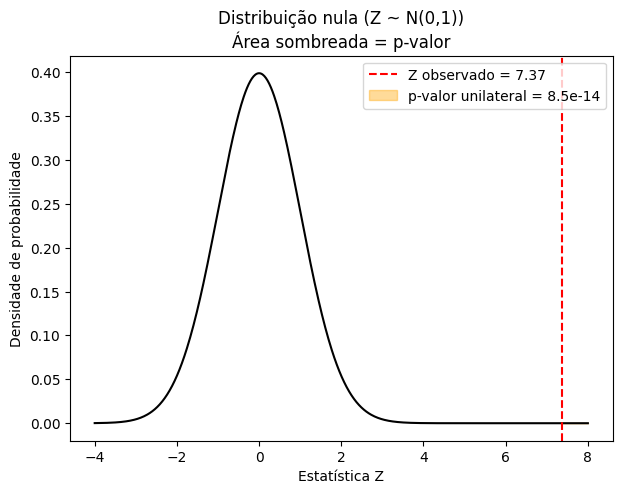

In [32]:
# Estatística Z e p-valor já calculados antes
z_obs = z_stat
p_val = p_value

# Eixo x e pdf da Normal(0,1)
xs = np.linspace(-4, 8, 600)
pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*xs**2)

# Plot
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(xs, pdf, color='black')
ax.axvline(z_obs, color='red', linestyle='--', label=f"Z observado = {z_obs:.2f}")
mask = xs >= z_obs
ax.fill_between(xs, 0, pdf, where=mask, color='orange', alpha=0.4,
                label=f"p-valor unilateral = {p_val:.1e}")

ax.set_title("Distribuição nula (Z ~ N(0,1))\nÁrea sombreada = p-valor")
ax.set_xlabel("Estatística Z")
ax.set_ylabel("Densidade de probabilidade")
ax.legend()
plt.show()

##Conclusão

Com base na análise:

A campanha com anúncios foi bem-sucedida, pois o grupo exposto aos anúncios apresentou uma taxa de conversão maior (aproximadamente 2,5%) em comparação com o grupo de controle (cerca de 1,8%). Essa diferença (~0,7 ponto percentual) significa que proporcionalmente muito mais usuários compraram o produto quando viram os anúncios.

A diferença observada entre o grupo de teste e o grupo de controle é estatisticamente significativa. O teste A/B confirmou, com alto grau de confiança (p-valor ≪ 0,05), que a maior conversão no grupo dos anúncios não é aleatória, mas sim atribuível à campanha de marketing. Em termos de hipótese, rejeitamos H₀ e aceitamos H₁: a presença dos anúncios elevou significativamente a conversão.

Em resumo, os anúncios tiveram um efeito positivo e significativo nas vendas, indicando que a campanha de marketing gerou um aumento real nas conversões. Portanto, pode-se afirmar que a campanha foi efetiva, e a diferença de conversão entre os grupos de teste e controle pode ser diretamente atribuída à exposição aos anúncios (dentro do nível de confiança estabelecido).

Referências dos resultados: Os valores e conclusões aqui apresentados estão alinhados com análises prévias do mesmo dataset, que reportaram taxas de conversão de aproximadamente 1,8% (controle) vs 2,5% (teste) e constataram a significância estatística desta diferença em favor do grupo exposto aos anúncios. Isso reforça a confiabilidade dos achados de que a campanha publicitária aumentou as conversões de forma significativa.

In [34]:
# @title Painel interativo do Teste A/B

# --------------------------
# 0) Preparar/validar dados
# --------------------------
if 'df' not in globals() or not isinstance(df, pd.DataFrame):
    raise ValueError("Não encontrei o DataFrame 'df'. Certifique-se de já ter carregado o dataset.")

needed = {'test group','converted'}
if not needed.issubset(set(df.columns.str.lower())):
    raise ValueError(f"Colunas esperadas ausentes. Encontrei: {sorted(df.columns)}")

# padronizar nomes
df = df.rename(columns={c: c.lower().strip() for c in df.columns})

# converter converted -> bool
if df['converted'].dtype == 'O':
    df['converted'] = df['converted'].astype(str).str.strip().str.lower().map({
        'true': True, 'false': False, '1': True, '0': False, 'yes': True, 'no': False
    }).fillna(False).astype(bool)
elif pd.api.types.is_numeric_dtype(df['converted']):
    df['converted'] = (df['converted'] > 0).astype(bool)

# contagens
group_counts = df['test group'].value_counts()
conv_counts  = df.loc[df['converted'], 'test group'].value_counts()

# extrair métricas
n_ad  = int(group_counts.get('ad', 0))
n_psa = int(group_counts.get('psa', 0))
x_ad  = int(conv_counts.get('ad', 0))
x_psa = int(conv_counts.get('psa', 0))

if min(n_ad, n_psa) == 0:
    raise ValueError("Não encontrei ambos os grupos 'ad' e 'psa' no df.")

p_ad  = x_ad / n_ad
p_psa = x_psa / n_psa
diff = p_ad - p_psa
lift_rel = (p_ad / p_psa - 1) if p_psa > 0 else np.nan

# testes estatísticos
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

z_two, p_two = sm.stats.proportions_ztest([x_ad, x_psa], [n_ad, n_psa], alternative='two-sided')
z_one, p_one = sm.stats.proportions_ztest([x_ad, x_psa], [n_ad, n_psa], alternative='larger')

# IC95% (Wilson)
ci_ad_low,  ci_ad_high  = proportion_confint(x_ad,  n_ad, method='wilson')
ci_psa_low, ci_psa_high = proportion_confint(x_psa, n_psa, method='wilson')

# Cohen's h para proporções (tamanho de efeito)
def cohens_h(p1, p2):
    return 2*np.arcsin(np.sqrt(p1)) - 2*np.arcsin(np.sqrt(p2))
h = cohens_h(p_ad, p_psa)

# Poder (aprox. teste unilateral à direita, alpha=0.05)
alpha = 0.05
from scipy.stats import norm
z_alpha = norm.ppf(1 - alpha)  # ~1.645
# erro padrão sob H1 (não-pooled): variância da diferença de proporções
se_h1 = np.sqrt(p_ad*(1-p_ad)/n_ad + p_psa*(1-p_psa)/n_psa)
# Se se_h1 zerar (caso extremo), evita divisão por zero
if se_h1 > 0:
    z_noncentral = diff / se_h1
    power_est = 1 - norm.cdf(z_alpha - z_noncentral)
else:
    power_est = np.nan

# ------------------------------------------------
# 1) Abas — cada aba mostra seus números e gráficos
# ------------------------------------------------

# Aba 1 — Resumo + Barras com IC
out1 = widgets.Output()
with out1:
    md = f"""
**Resumo do seu Teste A/B**

- **Controle (psa)**: n = {n_psa:,}, conv = {x_psa:,}, taxa = **{p_psa*100:.2f}%**
  IC95% (Wilson): [{ci_psa_low*100:.2f}%, {ci_psa_high*100:.2f}%]

- **Tratamento (ad)**: n = {n_ad:,}, conv = {x_ad:,}, taxa = **{p_ad*100:.2f}%**
  IC95% (Wilson): [{ci_ad_low*100:.2f}%, {ci_ad_high*100:.2f}%]

- **Diferença (ad - psa)**: **{diff*100:.2f} p.p.** ({lift_rel*100:.1f}% relativo)
- **Teste bilateral**: z = {z_two:.2f}, p = {p_two:.2e}
- **Teste unilateral (ad > psa)**: z = {z_one:.2f}, p = {p_one:.2e}
- **Tamanho de efeito (Cohen’s h)**: {h:.3f}  (≈0.2 pequeno, 0.5 médio, 0.8 grande)
- **Poder (α=0,05, unilateral)**: {power_est*100:.1f}% (aprox.)

"""
    display(Markdown(md))

    # Gráfico de barras com IC
    grupos = ['Controle (psa)', 'Tratamento (ad)']
    taxas  = [p_psa*100, p_ad*100]
    erro_inf = [(p_psa-ci_psa_low)*100, (p_ad-ci_ad_low)*100]
    erro_sup = [(ci_psa_high-p_psa)*100, (ci_ad_high-p_ad)*100]

    fig, ax = plt.subplots(figsize=(7,5))
    bars = ax.bar(grupos, taxas)
    ax.errorbar(grupos, taxas, yerr=[erro_inf, erro_sup], fmt='none', capsize=8)
    for rect, taxa, n, x in zip(bars, taxas, [n_psa, n_ad], [x_psa, x_ad]):
        ax.text(rect.get_x()+rect.get_width()/2, taxa + max(erro_sup)*0.15,
                f"{taxa:.2f}%\n(n={n:,}, conv={x:,})", ha='center', va='bottom')
    ax.set_ylabel("Taxa de conversão (%)")
    ax.set_title("Taxa de conversão com IC95% (Wilson)")
    ax.set_ylim(0, max(taxas)+max(erro_sup)*1.8)
    plt.tight_layout(); plt.show()

# Aba 2 — p-valor (unilateral) na distribuição nula
out2 = widgets.Output()
with out2:
    text = ("**P-valor (unilateral)**: área à direita do Z observado sob H₀ (Normal(0,1)).")
    display(Markdown(text))
    xs = np.linspace(-4, max(4, z_one+2.5), 600)
    pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*xs**2)
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(xs, pdf)
    ax.axvline(z_one, linestyle='--')
    mask = xs >= z_one
    ax.fill_between(xs, 0, pdf, where=mask, alpha=0.3)
    ax.set_title(f"Distribuição nula (Z ~ N(0,1)) — Unilateral (ad > psa)\nZ={z_one:.2f} | p={p_one:.2e}")
    ax.set_xlabel("Z"); ax.set_ylabel("Densidade"); plt.tight_layout(); plt.show()

# Aba 3 — α, região crítica e seu Z
out3 = widgets.Output()
with out3:
    display(Markdown("**Nível de significância (α)** e região crítica (unicaudal, α=0,05)."))
    alpha = 0.05
    from scipy.stats import norm
    crit = norm.ppf(1 - alpha)  # ~1.645
    x = np.linspace(-4, 4, 400)
    pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*x**2)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(x, pdf)
    ax.fill_between(x, 0, pdf, where=(x >= crit), alpha=0.3)
    ax.axvline(crit, linestyle='--')
    ax.axvline(z_one, linestyle=':', label=f"Z observado = {z_one:.2f}")
    ax.set_title(f"α=0,05 (cauda direita) — região crítica a partir de {crit:.2f}")
    ax.set_xlabel("Z"); ax.set_ylabel("Densidade"); ax.legend()
    plt.tight_layout(); plt.show()

# Aba 4 — Unilateral vs Bilateral (usando seu Z/p)
out4 = widgets.Output()
with out4:
    text = ("**Unilateral vs Bilateral**: no bilateral, a área de p-valor é distribuída em duas caudas; no unilateral, fica só na cauda direita.")
    display(Markdown(text))
    xs = np.linspace(-4, max(4, abs(z_two)+2.5), 600)
    pdf = 1/np.sqrt(2*np.pi) * np.exp(-0.5*xs**2)
    fig, axes = plt.subplots(1,2, figsize=(10,4))

    # unilateral
    axes[0].plot(xs, pdf)
    axes[0].axvline(z_one, linestyle='--')
    axes[0].fill_between(xs, 0, pdf, where=(xs >= z_one), alpha=0.3)
    axes[0].set_title(f"Unilateral (ad > psa)\nZ={z_one:.2f} | p={p_one:.2e}")

    # bilateral
    axes[1].plot(xs, pdf)
    axes[1].axvline(z_two, linestyle='--')
    mask = (xs >= abs(z_two)) | (xs <= -abs(z_two))
    axes[1].fill_between(xs, 0, pdf, where=mask, alpha=0.3)
    axes[1].set_title(f"Bilateral (diferença ≠ 0)\nZ={z_two:.2f} | p={p_two:.2e}")

    for ax in axes:
        ax.set_xlabel("Z"); ax.set_ylabel("Densidade")
    plt.tight_layout(); plt.show()

# Aba 5 — Poder (aproximação com seu efeito e n)
out5 = widgets.Output()
with out5:
    md = f"""
**Poder estatístico (aprox., α=0,05, unicaudal)**

- Diferença observada: **{diff*100:.2f} p.p.**
- Erro padrão sob H₁ (não-pooled): {se_h1:.6f}
- z* necessário (α=0,05): {z_alpha:.3f}
- Parâmetro não-central (dif/SE): {z_noncentral:.3f}
- **Poder estimado**: **{power_est*100:.1f}%**
"""
    display(Markdown(md))

    # ilustrar H0 e H1 com limiar crítico
    x = np.linspace(-4, 8, 500)
    # Distribuições sob H0 e H1 (desloca H1 pela não-centralidade)
    pdf_H0 = 1/np.sqrt(2*np.pi) * np.exp(-0.5*x**2)
    pdf_H1 = 1/np.sqrt(2*np.pi) * np.exp(-0.5*(x - z_noncentral)**2)
    fig, ax = plt.subplots(figsize=(7,4))
    ax.plot(x, pdf_H0, linestyle='--', label="H0")
    ax.plot(x, pdf_H1, label="H1 (aprox.)")
    ax.axvline(z_alpha, linestyle='--', label=f"limiar crítico (α=0,05) ≈ {z_alpha:.2f}")
    ax.fill_between(x, 0, pdf_H1, where=(x >= z_alpha), alpha=0.3, label="Poder (1-β)")
    ax.set_xlabel("Z"); ax.set_ylabel("Densidade"); ax.legend()
    ax.set_title("Poder: área sob H1 além do limiar crítico")
    plt.tight_layout(); plt.show()

# Aba 6 — Tamanho do efeito (Cohen's h) com referência
out6 = widgets.Output()
with out6:
    display(Markdown(f"**Cohen’s h** calculado a partir das suas proporções: **h = {h:.3f}**  "
                     "(≈0.2 pequeno, 0.5 médio, 0.8 grande)."))
    x = np.linspace(0, 1, 400)
    h_small, h_med, h_big = 0.2, 0.5, 0.8
    fig, ax = plt.subplots(figsize=(7,4))
    ax.axhline(h_small, linestyle=':', label='0.2 (pequeno)')
    ax.axhline(h_med,   linestyle='--', label='0.5 (médio)')
    ax.axhline(h_big,   linestyle='-.', label='0.8 (grande)')
    ax.axhline(abs(h), linewidth=2, label=f"h observado = {abs(h):.3f}")
    ax.set_ylim(0, 1.0)
    ax.set_xlabel("referência"); ax.set_ylabel("|h|")
    ax.set_title("Escala de referência para Cohen’s h")
    ax.legend(); plt.tight_layout(); plt.show()

# Aba 7 — Como o IC encolhe com mais amostra (simulação de cenário)
out7 = widgets.Output()
with out7:
    display(Markdown("**Efeito do tamanho de amostra no IC (simulação multiplicando n por k)**"))
    ks = [0.5, 1, 2, 4]
    rows = []
    for k in ks:
        nA, nB = int(n_psa*k), int(n_ad*k)
        xA, xB = int(p_psa*nA), int(p_ad*nB)
        loA, hiA = proportion_confint(xA, nA, method='wilson')
        loB, hiB = proportion_confint(xB, nB, method='wilson')
        rows.append((k, (hiB-loB)*100, (hiA-loA)*100))
    sim = pd.DataFrame(rows, columns=['k (multiplicador de n)', 'Largura IC ad (p.p.)', 'Largura IC psa (p.p.)'])
    display(sim)

# Aba 8 — Erros Tipo I e II com seu limiar
out8 = widgets.Output()
with out8:
    display(Markdown("**Erros Tipo I (α) e Tipo II (β)** ilustrados no seu limiar crítico (unicaudal)."))
    thr = z_alpha
    x = np.linspace(-4, 8, 500)
    pdf_H0 = 1/np.sqrt(2*np.pi) * np.exp(-0.5 * x**2)
    pdf_H1 = 1/np.sqrt(2*np.pi) * np.exp(-0.5 * (x - z_noncentral)**2)
    fig, ax = plt.subplots(figsize=(7,4))
    ax.plot(x, pdf_H0, linestyle='--', label="H0")
    ax.plot(x, pdf_H1, label="H1 (aprox.)")
    ax.axvline(thr, linestyle='--', label=f"limiar crítico ≈ {thr:.2f}")
    # α: cauda direita sob H0
    ax.fill_between(x, 0, pdf_H0, where=(x >= thr), alpha=0.3, label="Erro Tipo I (α)")
    # β: área sob H1 à esquerda do limiar
    ax.fill_between(x, 0, pdf_H1, where=(x < thr), alpha=0.3, label="Erro Tipo II (β)")
    ax.set_xlabel("Z"); ax.set_ylabel("Densidade"); ax.legend()
    ax.set_title("Áreas de α e β no seu cenário")
    plt.tight_layout(); plt.show()

# Montar as abas
tabs = widgets.Tab(children=[out1, out2, out3, out4, out5, out6, out7, out8])
titles = ["Resumo + IC", "p-valor (uni)", "α e região crítica", "Uni vs Bi", "Poder (aprox.)",
          "Tamanho do efeito", "Amostra vs IC", "Erros I/II"]
for i, t in enumerate(titles):
    tabs.set_title(i, t)

display(tabs)